       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


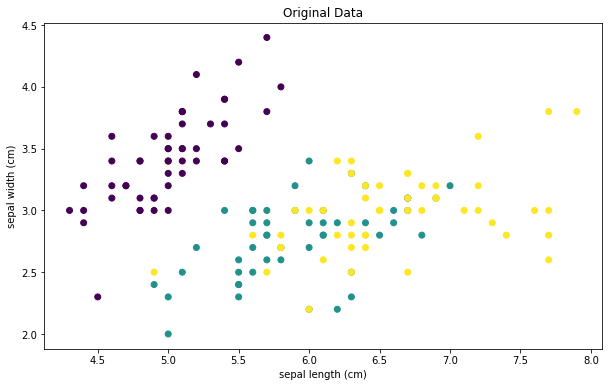

Silhouette Score: 0.46550099813132334


/home/fflab/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


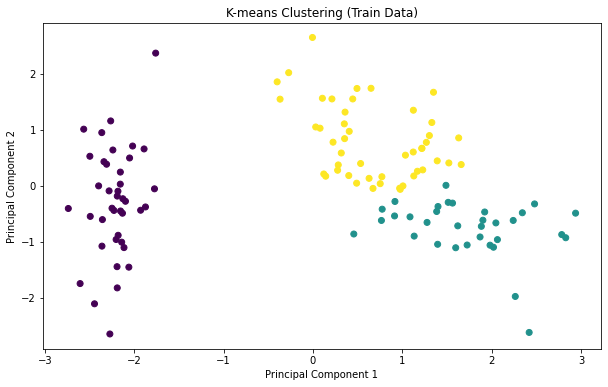

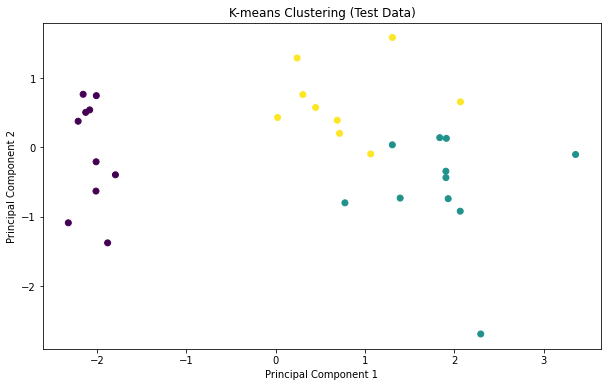

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Step 1: Prepare Problem
# a) Load libraries

# b) Load dataset
data = load_iris()
X = data.data
y = data.target

# Step 2: Summarize Data
# a) Descriptive statistics
df = pd.DataFrame(X, columns=data.feature_names)
print(df.describe())

# b) Data visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Original Data")
plt.show()

# Step 3: Prepare Data
# a) Data cleaning (not needed for Iris dataset)

# b) Feature selection (not needed for Iris dataset)

# c) Data transforms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Evaluate Algorithms
# a) Split-out validation dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# b) Test options and evaluation metric

# c) Spot check algorithms
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
labels_train = kmeans.labels_

# d) Compare Algorithms
silhouette_avg = silhouette_score(X_train, labels_train)
print("Silhouette Score:", silhouette_avg)

# Step 5: Improve Accuracy
# a) Algorithm tuning (not applicable for K-means clustering)

# b) Ensembles (not applicable for K-means clustering)

# Step 6: Finalize Model
# a) Predictions on validation dataset
labels_test = kmeans.predict(X_test)

# b) Create standalone model on entire training dataset (already done during evaluation)

# c) Save model for later use (not applicable for K-means clustering)

# Visualize the clustering results
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels_train, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering (Train Data)")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=labels_test, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering (Test Data)")
plt.show()